<a href="https://colab.research.google.com/github/Gaurav-poddar/Guvi_Final_Project/blob/main/Final_1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv('/content/hospital_readmissions.csv')
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [3]:
df.shape

(1000, 13)

In [4]:
#  Calculating the number of null values present in each column
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

In [5]:
# All values are unique values in 'Patient_ID' column
len(df.Patient_ID.unique())

1000

In [6]:
# Delete the column because 434 out of 1000 values are empty only
# It doesn't make any sense to keep the column
# All values are unique values so it doesn't make sense to keep 'Patient_ID' also
del df['A1C_Result'], df['Patient_ID']
df.isnull().sum()

Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
Readmitted               0
dtype: int64

In [7]:
# Number of columns after deleting the shape
df.shape

(1000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    1000 non-null   int64 
 1   Gender                 1000 non-null   object
 2   Admission_Type         1000 non-null   object
 3   Diagnosis              1000 non-null   object
 4   Num_Lab_Procedures     1000 non-null   int64 
 5   Num_Medications        1000 non-null   int64 
 6   Num_Outpatient_Visits  1000 non-null   int64 
 7   Num_Inpatient_Visits   1000 non-null   int64 
 8   Num_Emergency_Visits   1000 non-null   int64 
 9   Num_Diagnoses          1000 non-null   int64 
 10  Readmitted             1000 non-null   object
dtypes: int64(7), object(4)
memory usage: 86.1+ KB


## Data Preprocessing

---



In [9]:
# All unique values of categorical columns
print('Unique values of Gender column:',df.Gender.unique())
print('Unique values of Diagnosis column:',df.Diagnosis.unique())
print('Unique values of types of Admission for patients:',df.Admission_Type.unique())
print('Unique values of Readmitted column:',df.Readmitted.unique())

Unique values of Gender column: ['Other' 'Female' 'Male']
Unique values of Diagnosis column: ['Heart Disease' 'Diabetes' 'Injury' 'Infection']
Unique values of types of Admission for patients: ['Emergency' 'Urgent' 'Elective']
Unique values of Readmitted column: ['Yes' 'No']


In [10]:
# Gender Value frequency
df.Gender.value_counts()

Gender
Male      346
Female    337
Other     317
Name: count, dtype: int64

In [11]:
# Encoding all categorical columns
df['Gender'] = df['Gender'].map({'Other' : 0, 'Male': 1, 'Female': 2})
df['Readmitted'] = df['Readmitted'].map({'Yes' : 1, 'No': 0})

In [12]:
df.Diagnosis.value_counts()

Diagnosis
Diabetes         272
Infection        247
Injury           244
Heart Disease    237
Name: count, dtype: int64

In [13]:
df.Admission_Type.value_counts()

Admission_Type
Elective     345
Emergency    337
Urgent       318
Name: count, dtype: int64

In [14]:
# Encoding admission type column
df['Admission_Type'] = df['Admission_Type'].map({'Elective' : 0, 'Emergency': 1, 'Urgent': 2})

In [15]:
# Merging total number of hospital visists into a single column
df['Hospital_visits'] = df['Num_Emergency_Visits'] + df['Num_Inpatient_Visits'] + df['Num_Outpatient_Visits']

v-1

---



In [16]:
df['Diagnosis'] = df['Diagnosis'].map({'Diabetes' : 0, 'Infection': 1, 'Injury' : 2, 'Heart Disease' : 3})

v-2

---



In [ ]:
# Creating additional columns for diagnosis
df['Diagnosis_Diabetes'] = df['Diagnosis'].map(lambda x: 1 if x == 'Diabetes' else 0)
df['Diagnosis_Infection'] = df['Diagnosis'].map(lambda x: 1 if x == 'Infection' else 0)
df['Diagnosis_Injury'] = df['Diagnosis'].map(lambda x: 1 if x == 'Injury' else 0)
df['Diagnosis_Heart_Disease '] = df['Diagnosis'].map(lambda x: 1 if x == 'Heart Disease' else 0)

In [17]:
df.shape

(1000, 12)

In [18]:
# Let's see how our dataset stands after this implementation
df.head()

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Readmitted,Hospital_visits
0,69,0,1,3,33,2,4,1,1,5,1,6
1,32,2,2,0,81,10,4,4,1,6,0,9
2,78,2,2,3,75,29,4,0,3,5,0,7
3,38,1,0,0,77,11,2,3,4,9,1,9
4,41,2,2,0,50,25,3,4,1,3,1,8


In [19]:
# Removing Diagnosis column
# df.drop(['Diagnosis','Num_Emergency_Visits', 'Num_Inpatient_Visits','Num_Outpatient_Visits'], axis = 1, inplace = True) #if run v-2 run this
df.drop(['Num_Emergency_Visits', 'Num_Inpatient_Visits','Num_Outpatient_Visits'], axis = 1, inplace = True) # if run v-1 run this

In [20]:
df.shape

(1000, 9)

In [21]:
df.head()

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Diagnoses,Readmitted,Hospital_visits
0,69,0,1,3,33,2,5,1,6
1,32,2,2,0,81,10,6,0,9
2,78,2,2,3,75,29,5,0,7
3,38,1,0,0,77,11,9,1,9
4,41,2,2,0,50,25,3,1,8


In [22]:
df.Readmitted = df.Readmitted.astype('str')

## EDA

---



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

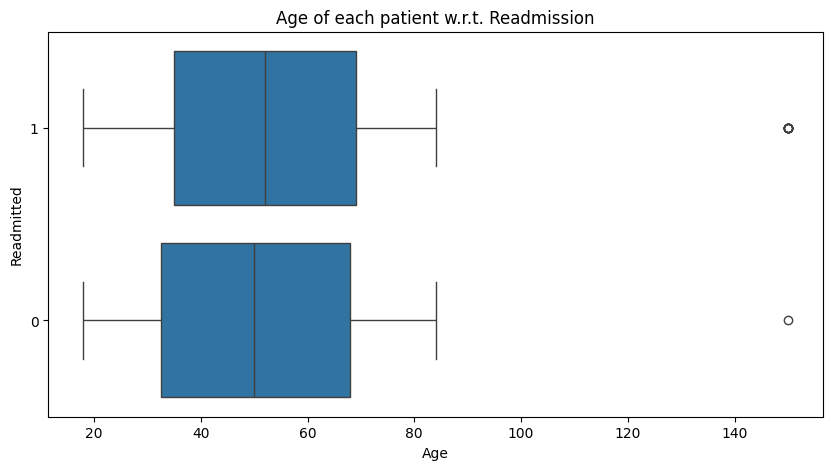

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Age', y = 'Readmitted', data = df)
plt.title('Age of each patient w.r.t. Readmission')
plt.show()

We have found outliers in our age column. The values are all greater than 140 as we can see through the boxplot. We will try to delete all the outlier values as they are relativly low.


In [25]:
df[df['Age']> 140][['Age', 'Readmitted']]

,Age,Readmitted
50,150,1
51,150,1
52,150,1
53,150,1
54,150,1
55,150,1
56,150,1
57,150,1
58,150,0
59,150,1


In [26]:
# Dropped all the Age Outliers row values
df.drop(range(50,60), inplace= True)

In [27]:
df.shape

(990, 9)

In [28]:
# As we can see the row values are sucessfully removed
df.iloc[45:60]

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Diagnoses,Readmitted,Hospital_visits
45,64,1,0,3,43,9,2,1,2
46,52,0,1,3,39,27,6,0,11
47,53,0,1,1,81,25,8,1,4
48,67,1,1,3,59,9,6,1,5
49,21,0,2,3,84,22,9,0,6
60,31,2,0,1,28,22,4,1,5
61,65,0,1,1,42,22,5,0,3
62,32,0,2,1,43,18,7,1,4
63,79,0,2,0,85,15,9,1,7
64,57,0,0,1,88,17,6,1,7


In [29]:
# Now we will reset index
df.reset_index(inplace=True)

In [30]:
df.shape

(990, 10)

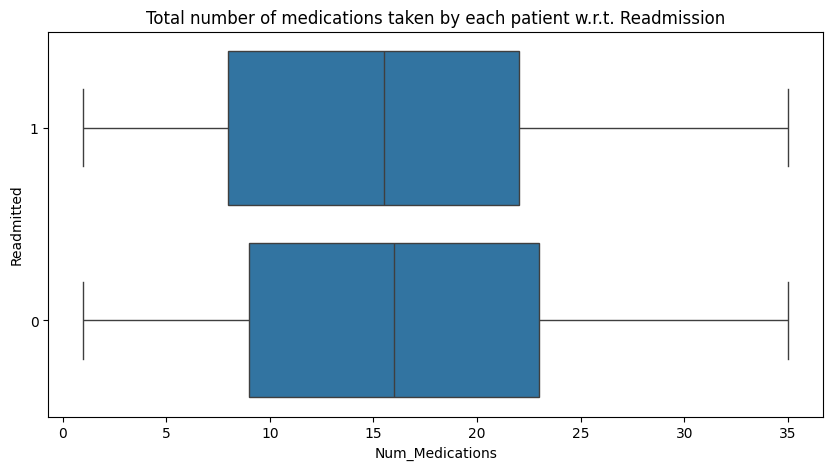

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Num_Medications', y = 'Readmitted', data = df)
plt.title('Total number of medications taken by each patient w.r.t. Readmission')
plt.show()

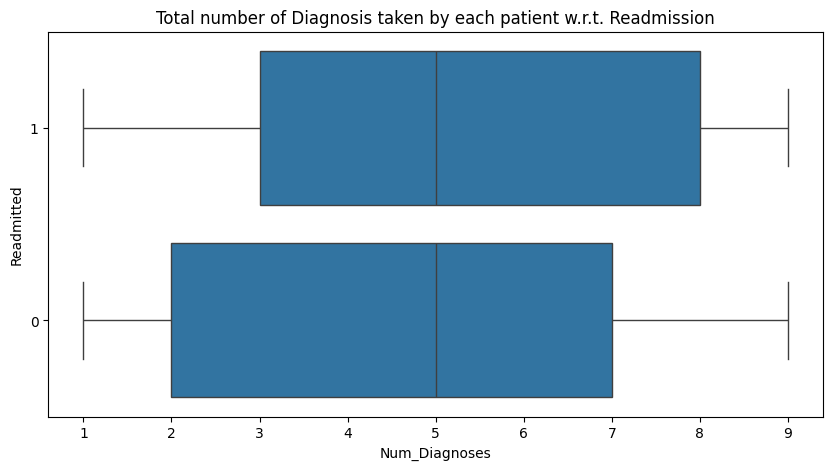

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'Num_Diagnoses', y = 'Readmitted')
plt.title('Total number of Diagnosis taken by each patient w.r.t. Readmission')
plt.show()

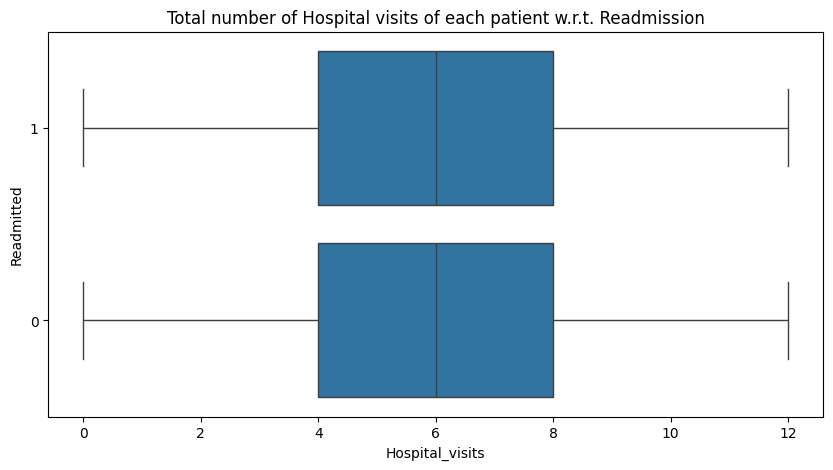

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'Hospital_visits', y = 'Readmitted')
plt.title('Total number of Hospital visits of each patient w.r.t. Readmission')
plt.show()

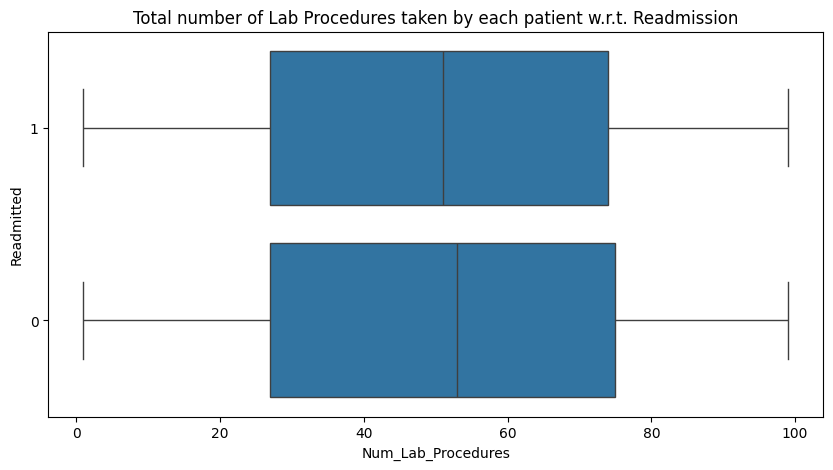

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'Num_Lab_Procedures', y= 'Readmitted')
plt.title('Total number of Lab Procedures taken by each patient w.r.t. Readmission')
plt.show()

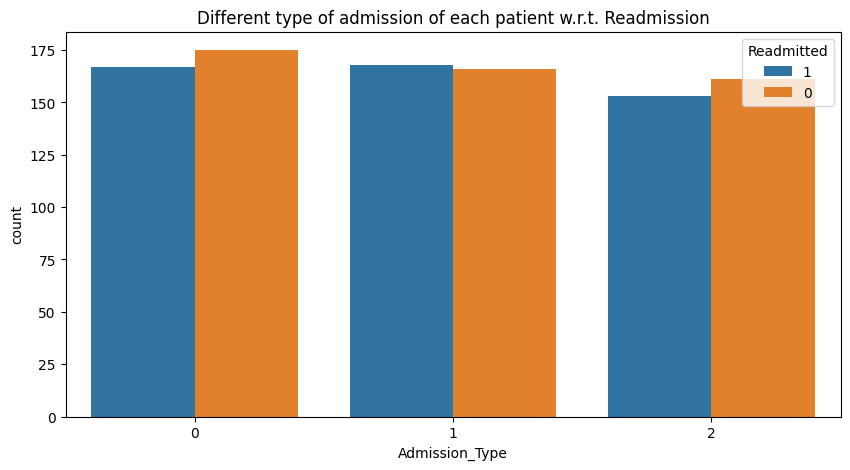

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'Admission_Type', hue = 'Readmitted')
plt.title('Different type of admission of each patient w.r.t. Readmission')
plt.show()

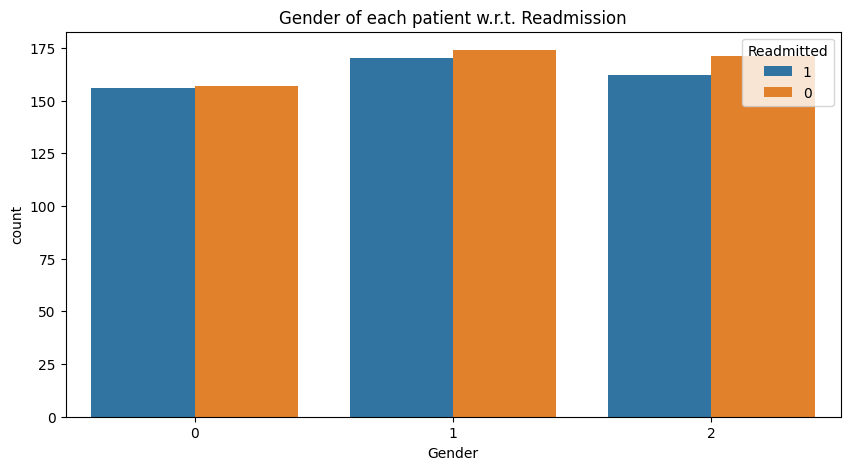

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'Gender', hue = 'Readmitted')
plt.title('Gender of each patient w.r.t. Readmission')
plt.show()

## Feature Engineering

---



In [37]:
feature_list = list(df.columns.values)
# feature_list = [e for e in feature_list if e not in ('Readmitted','index','Gender','Admission_Type','Num_Lab_Procedures', 'Hospital_visits')]
feature_list.remove('index')
feature_list.remove('Readmitted')

In [40]:
X = df[feature_list]
y = df['Readmitted'].astype('int')
feature_names = feature_list

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42) # Split dataset into 80% train and 20% test
clf = RandomForestClassifier(n_estimators=100, random_state=4)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [41]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': feature_names, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
print(perm_imp_df.sort_values(by= 'Permutation Importance',ascending = False))

              Feature  Permutation Importance
3           Diagnosis                0.035859
4  Num_Lab_Procedures                0.012121
0                 Age                0.002525
2      Admission_Type                0.002020
1              Gender                0.000505
7     Hospital_visits               -0.008586
5     Num_Medications               -0.017677
6       Num_Diagnoses               -0.021212


In [42]:
df.corr().loc[:,'Readmitted'].sort_values(ascending = False)

Readmitted            1.000000
Num_Diagnoses         0.063308
Age                   0.031254
Diagnosis             0.021021
Hospital_visits       0.011950
Admission_Type       -0.000492
index                -0.002993
Num_Lab_Procedures   -0.006101
Gender               -0.009654
Num_Medications      -0.027771
Name: Readmitted, dtype: float64

In [43]:
feature_list = [e for e in feature_list if e not in ('Readmitted','index','Gender','Admission_Type','Num_Medications')]
X = df[feature_list]

Modeling

---



In [44]:
print(X.shape)
print(y.shape)

(990, 5)
(990,)


In [45]:
y.value_counts()

Readmitted
0    502
1    488
Name: count, dtype: int64

Logistic Regression

---



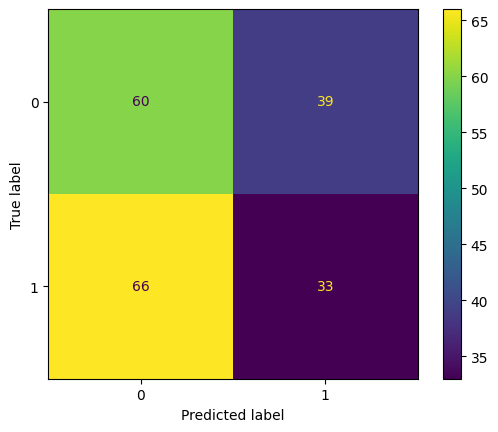

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear')
logit.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logit.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1])
# Display the confusion matrix
cmd.plot()
plt.show()

In [47]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score



# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the accuracy, precision, and recall
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Alternatively, you can get a detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[60 39]
 [66 33]]
Accuracy: 0.4697
Precision: 0.4583
Recall: 0.3333
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.61      0.53        99
           1       0.46      0.33      0.39        99

    accuracy                           0.47       198
   macro avg       0.47      0.47      0.46       198
weighted avg       0.47      0.47      0.46       198



Decision Tree

---



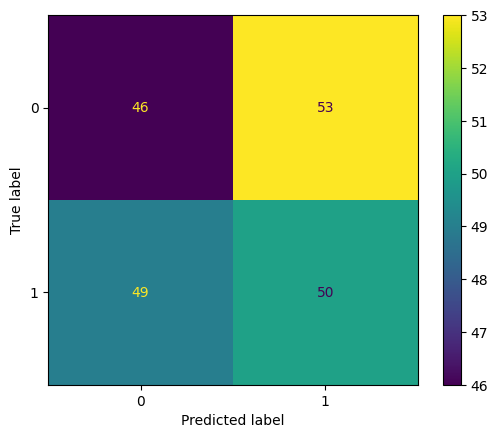

In [48]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1])
# Display the confusion matrix
cmd.plot()
plt.show()

In [49]:
# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the accuracy, precision, and recall
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Alternatively, you can get a detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[46 53]
 [49 50]]
Accuracy: 0.4848
Precision: 0.4854
Recall: 0.5051
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47        99
           1       0.49      0.51      0.50        99

    accuracy                           0.48       198
   macro avg       0.48      0.48      0.48       198
weighted avg       0.48      0.48      0.48       198



Random Forest

---



In [50]:

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)


RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

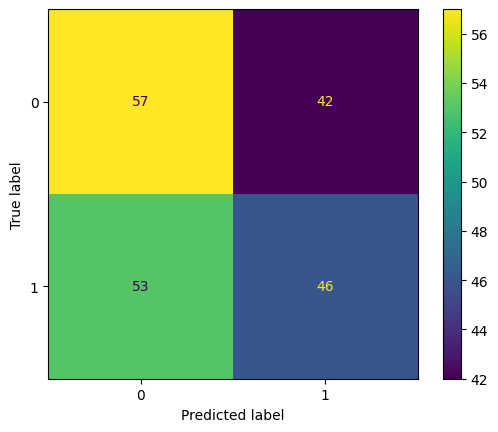

[[57 42]
 [53 46]]
Accuracy: 0.5202
Precision: 0.5227
Recall: 0.4646
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.58      0.55        99
           1       0.52      0.46      0.49        99

    accuracy                           0.52       198
   macro avg       0.52      0.52      0.52       198
weighted avg       0.52      0.52      0.52       198



In [51]:
y_pred = rm.predict(X_test)
# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1])
# Display the confusion matrix
cmd.plot()
plt.show()
print(cm)

# Print the accuracy, precision, and recall
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Alternatively, you can get a detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)